Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Step 2: Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 3: Data Preprocessing

In [4]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Handle missing values if there are any
data = data.dropna()

# Scale the data for K-means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)



Step 4: Determine the Optimal Number of Clusters

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.

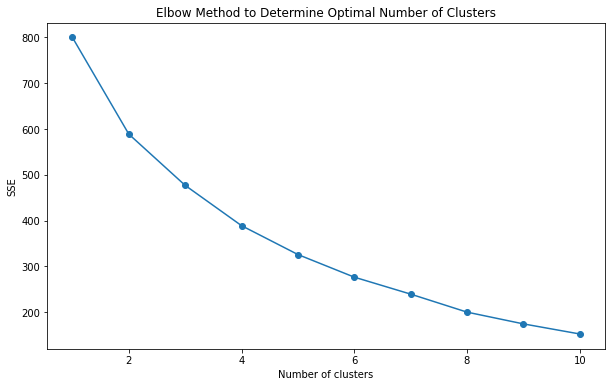

In [5]:
# Use the Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()


Step 5: Apply K-means Clustering

In [6]:
# Set the optimal number of clusters based on the Elbow plot
optimal_clusters = 3  # Example, replace with your actual number

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster assignments to the original data
data['Cluster'] = clusters


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Step 6: Analyze the Clusters

In [7]:
# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()

print(cluster_analysis)


               Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Cluster                                                                    
0        28.047059           61.788235               72.882353     0.458824
1        45.075758           57.727273               36.181818     0.000000
2        49.204082           62.244898               29.734694     1.000000


Step 7: Visualize the Clusters

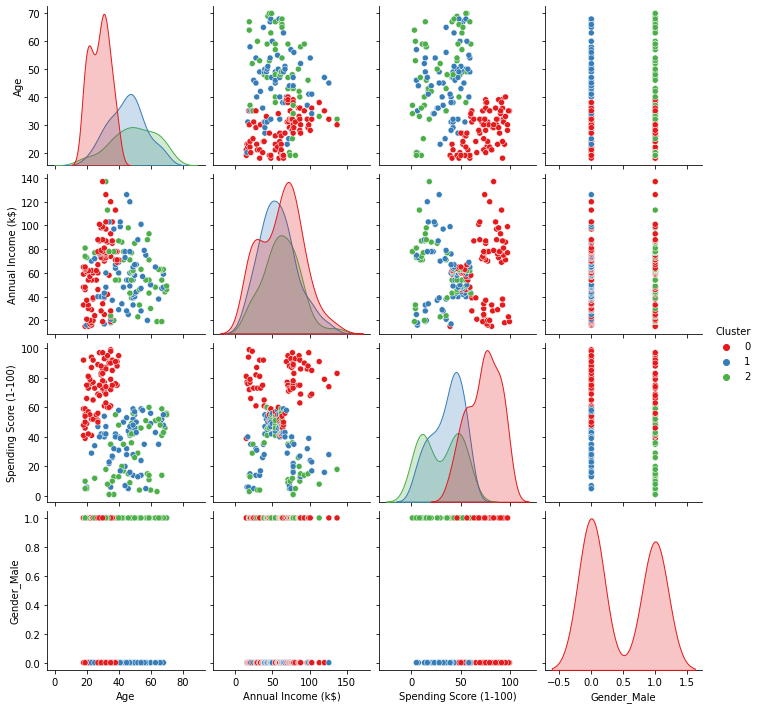

In [8]:
# Visualize the clusters
sns.pairplot(data, hue='Cluster', palette='Set1')
plt.show()